In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
data= pd.read_csv("gender_submission.csv")
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
lr = 0.009
#filling all NaN with 0
train_data=train_data.fillna(0)
test_data=test_data.fillna(0)

In [155]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [156]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


In [157]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [158]:
#test.Survived.value_counts()-->error#thats what we find

In [159]:
train_data.shape

(891, 12)

In [160]:
test_data.shape

(418, 11)

In [161]:
#creating dummy variables
train_data_sex = pd.get_dummies(train_data['Sex'])
train_data_new = pd.concat([train_data, train_data_sex], axis=1)
train_data_new = train_data_new.drop('Sex', axis=1)

train_data_em = pd.get_dummies(train_data_new['Embarked'])
train_data_new = pd.concat([train_data_new, train_data_em], axis=1)
train_data_new = train_data_new.drop('Embarked', axis=1)

train_data_new = train_data_new.drop('Ticket', axis=1)
train_data_new = train_data_new.drop('Name', axis=1)
train_data_new = train_data_new.drop('Cabin', axis=1)
train_data_new = train_data_new.drop('PassengerId',axis=1)

In [162]:
norm = (train_data_new-train_data_new.mean())/(train_data_new.max()-train_data_new.min())#normalised train data 
#including Survived column
features =norm.drop('Survived', axis=1)
targets =train_data_new.iloc[:,0:1]
features

,Pclass,Age,SibSp,Parch,Fare,female,male,0,C,Q,S
0,0.345679,-0.022491,0.059624,-0.063599,-0.048707,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217
1,-0.654321,0.177509,0.059624,-0.063599,0.076277,0.647587,-0.647587,-0.002245,0.811448,-0.08642,-0.722783
2,0.345679,0.027509,-0.065376,-0.063599,-0.047390,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
3,-0.654321,0.140009,0.059624,-0.063599,0.040786,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
4,0.345679,0.140009,-0.065376,-0.063599,-0.047146,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.154321,0.040009,-0.065376,-0.063599,-0.037484,-0.352413,0.352413,-0.002245,-0.188552,-0.08642,0.277217
887,-0.654321,-0.059991,-0.065376,-0.063599,-0.004302,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
888,0.345679,-0.297491,0.059624,0.269734,-0.017087,0.647587,-0.647587,-0.002245,-0.188552,-0.08642,0.277217
889,-0.654321,0.027509,-0.065376,-0.063599,-0.004302,-0.352413,0.352413,-0.002245,0.811448,-0.08642,-0.722783


In [163]:
features=np.array(features)
targets=np.array(targets)
print(features.shape,targets.shape)

(891, 11) (891, 1)


In [164]:
weights = np.zeros([11,1])
weights.shape

(11, 1)

In [165]:
def predict(features, weights):
    z = np.dot(features, weights)
    predictions=1/(1+np.exp(-z))
    return predictions

In [166]:
features[:5]

array([[ 0.34567901, -0.02249116,  0.05962402, -0.06359895, -0.04870737,
        -0.35241302,  0.35241302, -0.00224467, -0.18855219, -0.08641975,
         0.27721661],
       [-0.65432099,  0.17750884,  0.05962402, -0.06359895,  0.07627731,
         0.64758698, -0.64758698, -0.00224467,  0.81144781, -0.08641975,
        -0.72278339],
       [ 0.34567901,  0.02750884, -0.06537598, -0.06359895, -0.04738986,
         0.64758698, -0.64758698, -0.00224467, -0.18855219, -0.08641975,
         0.27721661],
       [-0.65432099,  0.14000884,  0.05962402, -0.06359895,  0.04078587,
         0.64758698, -0.64758698, -0.00224467, -0.18855219, -0.08641975,
         0.27721661],
       [ 0.34567901,  0.14000884, -0.06537598, -0.06359895, -0.04714587,
        -0.35241302,  0.35241302, -0.00224467, -0.18855219, -0.08641975,
         0.27721661]])

In [167]:
weights[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [168]:
predict(features, weights)[:5]

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [169]:
# loss=cost (h(x),y)=-y(log(h(x)))-(1-y)log(1-h(x));y=targets(0 or 1);h(x)=predictions(0 to 1)
#J(theta)=-loss/m;N=no.of training examples=m;J(theta) for logistic regression=mse for linear regression
def loss_function(features, targets, weights):
    N = len(targets)#891
    predictions = predict(features, weights)
    loss = targets*np.log(predictions)+(1-targets)*np.log(1-predictions)
    mse=(-1/N)*loss.sum()
    return mse

In [170]:
features.shape

(891, 11)

In [171]:
#features.T -->x(i)
#(11,891)*(891,1)---->(11,1)--->thetas
def update_weights(features, targets, weights, lr):
    N = len(features)
    predictions = predict(features, weights)
    gradient = np.dot(features.T,  predictions - targets)
    gradient /= N
    gradient *= lr
    weights -= gradient
    
    return weights

In [172]:
def train(features,targets, weights, lr, iters=10000):
    cost_history = []

    for i in range(10000):
        weights = update_weights(features,targets, weights, lr)
        cost = loss_function(features,targets, weights)
        cost_history.append(cost)    
    return cost_history,weights

In [173]:
mse,weights=train(features,targets, weights, lr, iters=10000)

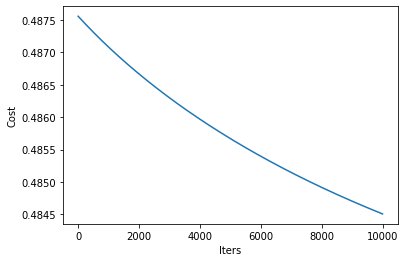

In [174]:
cost_history=[]
for i in range(10000):
        weights = update_weights(features,targets, weights, lr)
        cost = loss_function(features,targets, weights)
        cost_history.append(cost)
        
arr =[]
for i in range(1,10001):
    arr.append(i)
plt.plot(arr,cost_history)
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

In [175]:
weights[:5]

array([[-1.78844471],
       [-0.62155841],
       [-0.66020084],
       [-0.3068502 ],
       [ 0.36786999]])

In [176]:
predictions=predict(features, weights)
predictions[:5]


array([[0.1551276 ],
       [0.96053135],
       [0.73509405],
       [0.93637771],
       [0.15279555]])

In [177]:
targets[:5]#if we compare targets with predictions they are almost 
#similar hence now we can say our model is trained

array([[0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [178]:
print("train accuracy: {} %".format(100 - np.mean(np.abs(targets -predictions)) * 100))

train accuracy: 68.08581907776676 %


In [179]:
test_data_sex = pd.get_dummies(test_data['Sex'])
test_data_new = pd.concat([test_data, test_data_sex], axis=1)
test_data_new = test_data_new.drop('Sex', axis=1)

test_data_em = pd.get_dummies(test_data_new['Embarked'])
test_data_new = pd.concat([test_data_new, test_data_em], axis=1)
test_data_new = test_data_new.drop('Embarked', axis=1)

test_data_new = test_data_new.drop('Ticket', axis=1)
test_data_new = test_data_new.drop('Name', axis=1)
test_data_new =test_data_new.drop('Cabin', axis=1)
test_data_new = test_data_new.drop('PassengerId',axis=1)
test_features=test_data_new
#emarked:0 doesnt exist hence we create one
em_0 = np.zeros([418,1])
test_features['0']=em_0
test_features=test_features[['Pclass','Age','SibSp','Parch','Fare','female','male','0','C','Q','S']]


test_targets=data.drop('PassengerId',axis=1)

In [180]:
test_targets=data.drop('PassengerId',axis=1)


#bias = np.ones(shape=(len(test_features),1))
#test_features = np.append(bias, test_features, axis=1)

norm = (test_features-test_features.mean())/(test_features.max()-test_features.min())
print(test_features)



test_features=np.array(test_features)
test_targets=np.array(test_targets)
print(test_features.shape,test_targets.shape)

     Pclass   Age  SibSp  Parch      Fare  female  male    0  C  Q  S
0         3  34.5      0      0    7.8292       0     1  0.0  0  1  0
1         3  47.0      1      0    7.0000       1     0  0.0  0  0  1
2         2  62.0      0      0    9.6875       0     1  0.0  0  1  0
3         3  27.0      0      0    8.6625       0     1  0.0  0  0  1
4         3  22.0      1      1   12.2875       1     0  0.0  0  0  1
..      ...   ...    ...    ...       ...     ...   ...  ... .. .. ..
413       3   0.0      0      0    8.0500       0     1  0.0  0  0  1
414       1  39.0      0      0  108.9000       1     0  0.0  1  0  0
415       3  38.5      0      0    7.2500       0     1  0.0  0  0  1
416       3   0.0      0      0    8.0500       0     1  0.0  0  0  1
417       3   0.0      1      1   22.3583       0     1  0.0  1  0  0

[418 rows x 11 columns]
(418, 11) (418, 1)


In [181]:
new_predictions=predict(test_features, weights)
new_predictions[:5]

array([[1.00185134e-11],
       [1.90600670e-14],
       [4.47786592e-18],
       [1.18697532e-09],
       [5.49663814e-07]])

In [182]:
print("test accuracy: {} %".format(100 - np.mean(np.abs(new_predictions - test_targets)) * 100))

test accuracy: 66.62877882627981 %
